In [0]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
toggle = False

Data generation is perfectly working. One hot is disables by default but if enabled, one hot encoding will be there in output. Noise probability is working perfectly.

In [0]:
def generateData(numExamples, noise, numClasses, shape="g", onehot=False):
    Data = [[0, 0, 0]]
    if shape == 'g':
        for i in range(numClasses):
            Data = np.concatenate((Data, twoClusters(int(numExamples / numClasses), i)), axis=0)
    elif shape == 'c':
        for i in range(numClasses):
            Data = np.concatenate((Data, circles(int(numExamples / numClasses), i)), axis=0)
    else:
        raise Exception('Non-supported shape')
    Data = np.delete(Data, 0, axis=0)
    output = Noise(noise, Data, numClasses)
    #Data has been shuffled
    np.random.shuffle(output)
    plt.figure(figsize=(10, 10))
    plt.scatter(output[:, 0], output[:, 1], marker='o', c=output[:, 2])
    plt.axis('equal')
    plt.show()
    return output # This is how the data should be returned
    #if (onehot):
    #    final = class_into_probability(numClasses, Data[:, 2].reshape((len(Data), 1)), Data[:, 0:2])
    #    np.random.shuffle(final)
    #else:
    #    final = output
    #return final, output[:, 2:]


def class_into_probability(numClasses, labels, X):
    converted = np.zeros((len(labels), numClasses))
    for i, lable in enumerate(labels):
        converted[i][int(lable)] = 1
    f2 = np.vectorize(integer)
    print("one-hot format")
    return np.column_stack((X, f2(converted)))


def integer(X):
    return np.int(X)


def invert(tuple, numClasses):
    global toggle
    if int(tuple[2]) == 0:
        newTuple = np.array([tuple[0], tuple[1], 1])
        return newTuple
    elif int(tuple[2]) == (numClasses - 1):
        newTuple = np.array([tuple[0], tuple[1], (numClasses - 2)])
        return newTuple
    temp = tuple[2]
    if toggle:
        newTuple = np.array([tuple[0], tuple[1], temp + 1])
    else:
        newTuple = np.array([tuple[0], tuple[1], temp - 1])
    toggle = not toggle
    return newTuple


def Noise(probability, data, numClasses):
    if numClasses <= 1 or probability == 0:
        return data
    for i in range(len(data)):
        if random.random() <= probability:
            invertedTuple = invert(data[i], numClasses)
            data = np.delete(data, i, axis=0)
            data = np.insert(data, i, invertedTuple, axis=0)
    return data


def twoClusters(numExamples, iteration):
    Mx, My, sigma = 2 * iteration, 2 * iteration, 0.54
    X = np.random.normal(Mx, sigma, numExamples)
    Y = np.random.normal(My, sigma, numExamples)
    A = np.repeat(iteration, numExamples)
    output = np.column_stack((X, Y))
    return np.column_stack((output, A))


def circles(numExamples, iteration):
    data = []
    circle_r = 1
    circle_x = 5
    circle_y = 7
    for i in range(numExamples):
        alpha = 2 * math.pi * random.random()
        r = circle_r * math.sqrt(random.random()) + 1.3 * iteration
        x = r * math.cos(alpha) + circle_x
        y = r * math.sin(alpha) + circle_y
        data.append([x, y, int(iteration)])
    return np.array(data)



Respective activation functions and their deravitives. Softmax function derivative, I was not able to calculate.

In [0]:
def sigmoid(Z):
    Z = np.clip(Z, -100, 100)
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def sigmoid_backward(Z):
    
    return Z * (1 - Z)

def relu_backward(Z):
    return np.where(Z > 0, 1, 0)

def linear(Z):
    return Z

def linear_backward(Z):
    return np.ones(Z.shape)

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

def softmax_backward(dA, Z):
    pass

In [0]:
def train(input, numInput, numHiddenUnits, numOutput, activationType, numIter, learning_rate):
    X_train = input[:,:2]
    y_train = input[:,2:3]
    if activationType == "sigmoid":
        activation = sigmoid
        derivative = sigmoid_backward
    elif activationType == "relu":
        activation = relu
        derivative = relu_backward
    elif activationType == "linear":
        activation = linear
        derivative = linear_backward
    else:
        raise Exception('Non-supported activation function')

    Weight_0 = 0.1 * np.random.randn(numInput + 1, numHiddenUnits) + 2
    Weight_1 = 0.1 * np.random.randn(numHiddenUnits, numOutput) + 2
    errors = []
    for iteration in range(numIter):
        layer_0 = np.insert(X_train, 2, 1, axis=1)
        layer_1 = activation(np.dot(layer_0, Weight_0))
        layer_2 = sigmoid(np.dot(layer_1, Weight_1))
        layer2_error = y_train - layer_2
        layer2_delta = layer2_error * sigmoid_backward(layer_2)
        layer1_error = layer2_delta.dot(Weight_1.T)
        layer1_delta = layer1_error * derivative(layer_1)
        Weight_1 += learning_rate * (layer_1.T.dot(layer2_delta))
        Weight_0 += learning_rate * (layer_0.T.dot(layer1_delta))
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

    print(str(round(accuracy, 2)) + "%")
    return Weight_0, Weight_1


def test(input, W0, W1, activationType):
    if activationType == "sigmoid":
        activation = sigmoid
    elif activationType == "relu":
        activation = relu
    elif activationType == "linear":
        activation = linear
    else:
        raise Exception('Non-supported activation function')
    X_test = input[:,:2]
    y_test = input[:,2:3]
    layer0 = np.insert(X_test, 2, 1, axis=1)
    layer1 = activation(np.dot(layer0, W0))
    layer2 = sigmoid(np.dot(layer1, W1))
    layer2_error = y_test - layer2
    error = np.mean(np.abs(layer2_error))
    accuracy = (1 - error) * 100

    print("Validation Accuracy " + str(round(accuracy, 2)) + "%")


def predict(input, W0, W1, activationType):
    X = input[:,:2]
    if activationType == "sigmoid":
        activation = sigmoid
    elif activationType == "relu":
        activation = relu
    elif activationType == "linear":
        activation = linear
    else:
        raise Exception('Non-supported activation function')
    layer0 = np.insert(X, 2, 1, axis=1)
    layer1 = activation(np.dot(layer0, W0))
    layer2 = sigmoid(np.dot(layer1, W1))
    layer2 = np.round(layer2)
    return layer2




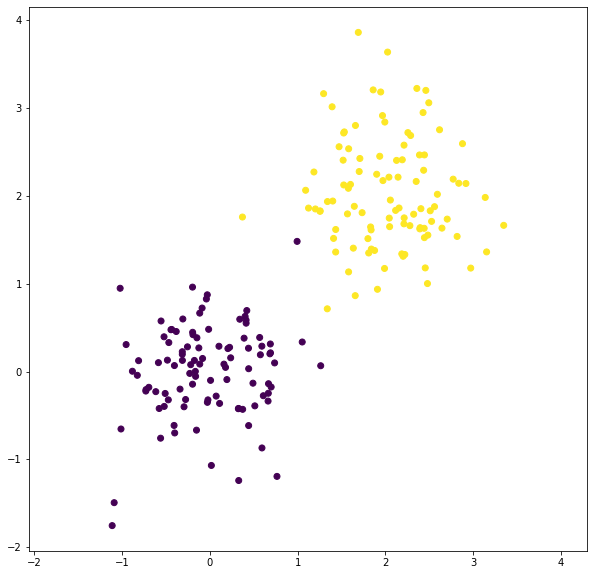

In [23]:
X = generateData(200, 0, 2, 'g')

74.25%
Validation Accuracy 74.25%


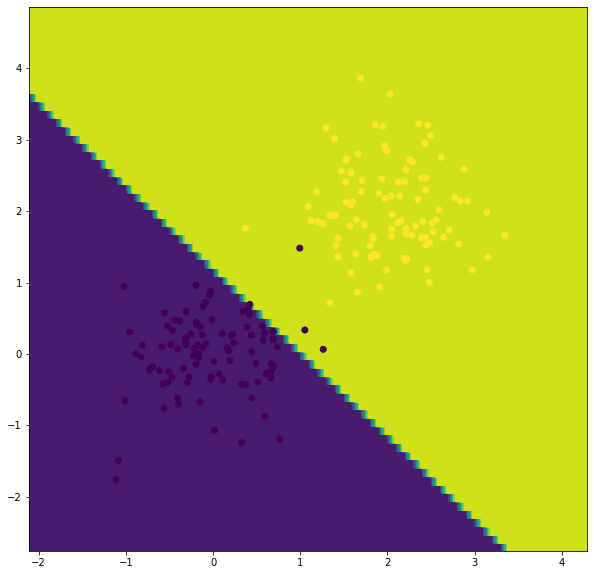

In [82]:
act = "relu"
weight0, weight1 = train(X, 2, 10, 1, act, 20000, 0.001)
test(X, weight0, weight1, act)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.01))
ar = np.array([xx.ravel(), yy.ravel()])
ar = np.append(ar, np.zeros((1, ar.shape[1])) + 1, axis=0)

Z = predict(ar.T, weight0, weight1, act)
z = Z[:, 0].reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.contourf(xx, yy, z)
plt.scatter(X[:, 0], X[:, 1], c=X[:, 2])
plt.show()

Model is the third part of assignment with object oriented approach.


*   Model class is working best for sigmoid.
*   model can accept variable number of hidden units.
*   model can accept variable number of hidden layers.
*   Model works for different activation functions but tuning of hyper parameters is required.
*   Model does NOT work for SOFTMAX part, though it can have multiple outputs derivative softmax activation function is not working






Model class creates the object of the enitre Neural Network. It encapsulates a layer class that is responsible to create layers of a neural network.
The design of the class is similar to that of a link list class where operations performed nodes are present on node class and operations on the entire list are present in the linklist class.

In [0]:
class model:
    def __init__(self, numInputs=2, numOutputs=1, layerSize=2, numHiddenLayers=2, activationType='R'):
        self.objects = []
        self.numInputs = numInputs
        self.numOutputs = numOutputs
        self.layerSize = layerSize
        self.numHiddenLayers = numHiddenLayers
        self.activationType = activationType

    def initWeights(self, mean, Standard_Deviation):
        self.mean = mean
        self.Standard_Deviation = Standard_Deviation

    def setTrain(self, X_train):
        self.X_train = np.insert(X_train, self.numInputs, 1, axis=1)

    def setTest(self, X_test):
        self.X_test = np.insert(X_test, self.numInputs, 1, axis=1)

    class layer:
        def __init__(self, numInput, numOutputs, mean, Standard_Deviation, activation="sigmoid"):
            np.random.seed(0)
            self.numInputs = numInput
            self.numOutputs = numOutputs
            self.mean = mean
            self.variance = Standard_Deviation ** 2
            self.Weights = self.variance * np.random.rand(self.numInputs, self.numOutputs) * 0.1 - self.mean
            self.activation = activation


        def getWeights(self):
            return self.Weights

        def forwardPropagation(self, Activation_previous, Weight_previous):

            self.A_prev = Activation_previous
            self.Z = np.dot(Activation_previous, Weight_previous)

            if self.activation is "relu":
                activation_func = relu
            elif self.activation is "sigmoid":
                activation_func = sigmoid
            elif self.activation is "linear":
                activation_func = linear
            elif self.activation is "softmax":
                activation_func = softmax
            else:
                raise Exception('Non-supported activation function')

            self.ActivationL = activation_func(self.Z)
            return self.ActivationL, self.Weights

        def backPropagation(self, Error):

            if self.activation is "relu":
                backward_activation_func = relu_backward
            elif self.activation is "sigmoid":
                backward_activation_func = sigmoid_backward
            elif self.activation is "linear":
                backward_activation_func = linear_backward
            elif self.activation is "softmax":
                backward_activation_func = sigmoid_backward
            else:
                raise Exception('Non-supported activation function')
            self.delta_layer = Error * backward_activation_func(self.ActivationL)
            return self.delta_layer

        def update(self, delta_array, learning_rate):

            self.Weights += learning_rate * ((self.ActivationL.T).dot(delta_array))

        def return_parameters(self):
            return self.Weights

    def completeForward(self, X):
        self.activationList = []
        activationInput = X
        self.activationList.append(activationInput)
        Weights = self.objects[0].getWeights()
        for i in range(1, len(self.objects)):
            obj = self.objects[i]
            activationInput, Weights = obj.forwardPropagation(activationInput, Weights)
            self.activationList.append(activationInput)
        return activationInput

    def predictionError(self, target, prediction):
        return target - prediction

    def completeBack(self, predictionError):

        self.delta_array = []
        error = predictionError
        delta = self.objects[-1].backPropagation(error)
        self.delta_array.append(delta)
        for i in range(len(self.objects) - 1, 0, -1):
            obj = self.objects[i]
            error = delta.dot(obj.getWeights().T)
            delta = obj.backPropagation(error)
            self.delta_array.append(delta)

    def update_parameters(self, learning_rate):
        count = 0
        for i in range(len(self.objects) - 1,0,-1):
            obj = self.objects[i]
            obj.update(self.delta_array[count], learning_rate)
            count += 1


    def create(self):
        objInp = self.layer(self.numInputs + 1, self.layerSize, self.mean, self.Standard_Deviation, self.activationType)
        self.objects.append(objInp)

        for i in range(self.numHiddenLayers):
            if i == self.numHiddenLayers - 1:
                end = self.numOutputs
            else:
                end = self.layerSize
            objHid = self.layer(self.layerSize, end, self.mean, self.Standard_Deviation, self.activationType)
            self.objects.append(objHid)
        if self.numOutputs > 1:
            objEnd = self.layer(self.numOutputs, 1, self.mean, self.Standard_Deviation, "softmax")
        else:
            objEnd = self.layer(self.numOutputs, 1, self.mean, self.Standard_Deviation, self.activationType)
        self.objects.append(objEnd)

    def return_model(self):
        weights = []
        for i in range(len(self.objects) - 1):
            obj = self.objects[i]
            weight = obj.return_parameters()
            weights.append(weight)
        return weights

    def train(self, epoch, learning_rate):
        self.create()
        # assumed X_train has bias
        data = self.X_train[:, :(self.numInputs)+1]
        target = self.X_train[:, (self.numInputs)+1:]
        for i in range(epoch):
            prediction = self.completeForward(data)
            predictionError = target-prediction
            self.completeBack(predictionError)
            self.update_parameters(learning_rate)
        return self.return_model()

    def predict(self, X_test):
        x_test = np.insert(X_test, self.numInputs, 1, axis=1)
        prediction = self.completeForward(x_test)
        return prediction


In [0]:
def plot_decision(X, t, activation):
    obj = model(2, 1, 4, 1, activation)
    obj.initWeights(1, 2)
    obj.setTrain(X)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    ar = np.array([xx.ravel(), yy.ravel()])

    cost = obj.train(50000  , 0.1)

    Z = obj.predict(ar.T)
    # z = obj.probability_into_class(Z)
    z = Z[:, 0].reshape(xx.shape)
    plt.figure(figsize=(10, 10))
    plt.contourf(xx, yy, z)
    plt.scatter(X[:, 0], X[:, 1], c=t[:, 0])
    plt.show()

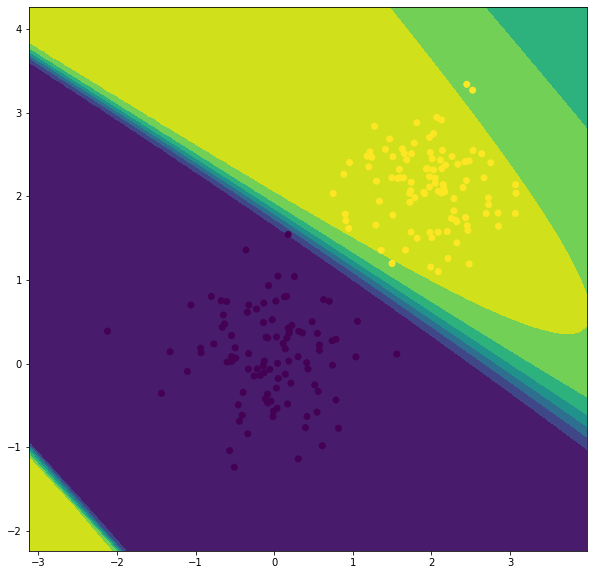

In [0]:
plot_decision(X, t, "sigmoid")

References: 
[1]2 Layer Neural Network from scratch using Numpy by Adeniyi Bello: https://www.kaggle.com/niyipop/2-layer-neural-network-from-scratch-using-numpy
last accessed 23/02/2020

[2] Let’s code a Neural Network in plain NumPy by Piotr Skalski: https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795
last accessed 23/02/2020
